In [1]:
import pandas as pd
import numpy as np

In [2]:
df_test=pd.read_csv("SalaryData_Test(1).csv")

In [3]:
df_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
df_train=pd.read_csv("SalaryData_Train(1).csv")
df_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [6]:
df_test['Salary']=lb.fit_transform(df_test['Salary'])
df_train['Salary']=lb.fit_transform(df_train['Salary'])

In [7]:
df1_test=pd.get_dummies(df_test)
df1_train=pd.get_dummies(df_train)

In [8]:
x_train=df1_train.drop('Salary',axis=1)
y_train=df1_train['Salary']
x_test=df1_test.drop('Salary',axis=1)
y_test=df1_test['Salary']

In [9]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

In [10]:
from sklearn.svm import SVC

In [11]:
model=SVC()
model.fit(x_train,y_train)

SVC()

In [12]:
pred=model.predict(x_test)

In [13]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))

[[10997  2703]
 [  363   997]]
              precision    recall  f1-score   support

           0       0.97      0.80      0.88     13700
           1       0.27      0.73      0.39      1360

    accuracy                           0.80     15060
   macro avg       0.62      0.77      0.64     15060
weighted avg       0.90      0.80      0.83     15060



In [16]:
np.mean(pred==y_test)*100

79.64143426294821

In [17]:
import matplotlib.pyplot as plt

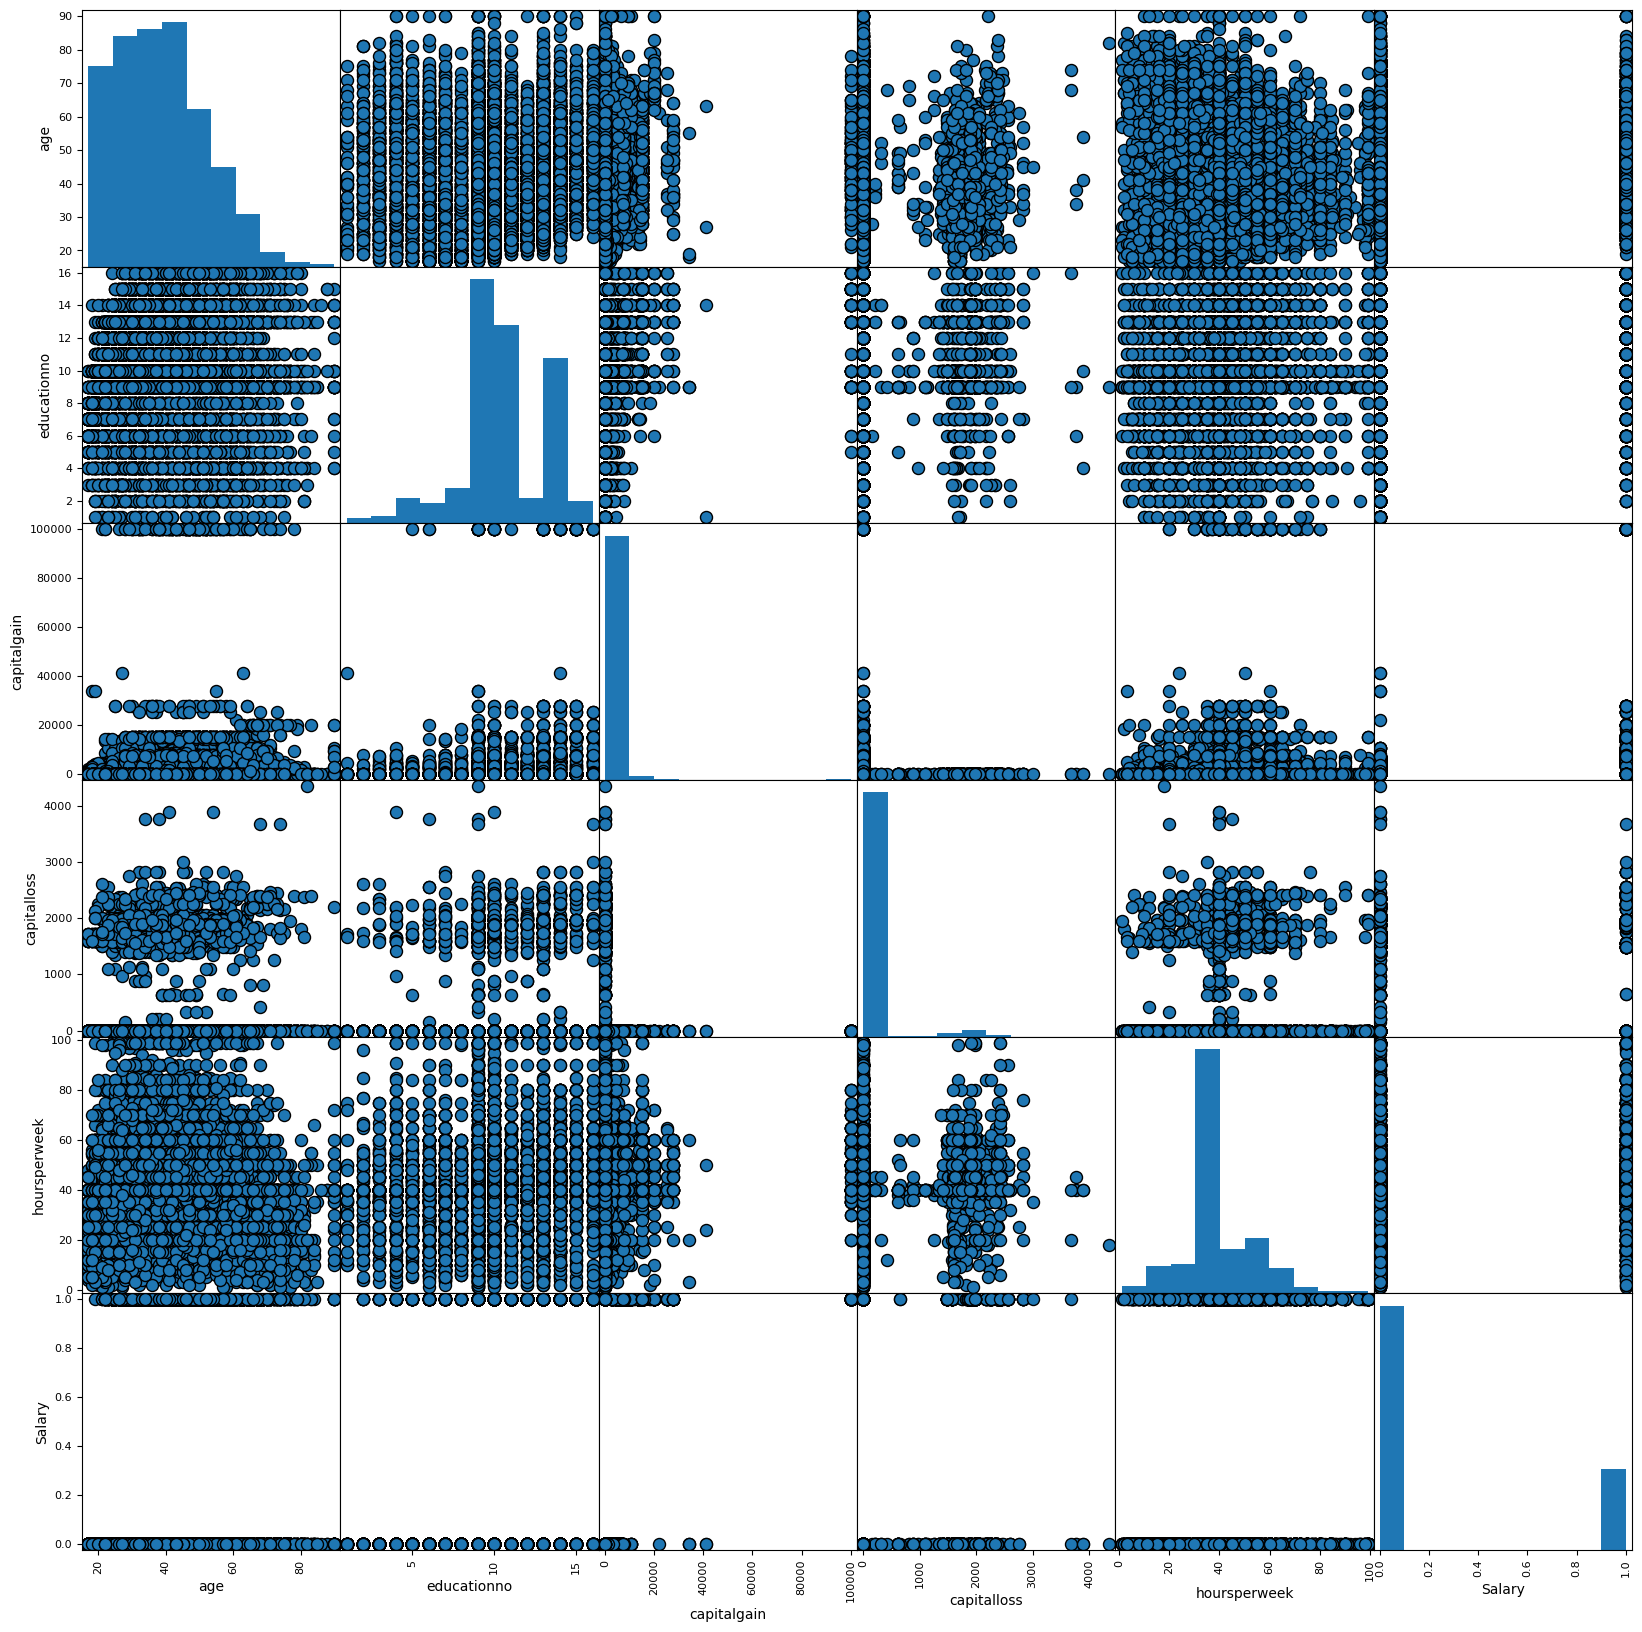

In [18]:
pd.plotting.scatter_matrix(df_train,figsize= [20,20],diagonal='hist',alpha=1,s = 300,marker = '.',edgecolor= "black")
plt.show()

In [19]:
string_columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [20]:
number = LabelEncoder()
for i in string_columns:
        df_train[i]= number.fit_transform(df_train[i])
        df_test[i]=number.fit_transform(df_test[i])


In [21]:
df_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [22]:
df_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [23]:
colnames = df_train.columns
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [24]:
len(colnames)


14

In [25]:
df_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [26]:
df_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [27]:
x_train = df_train[colnames[0:13]]
y_train = df_train[colnames[13]]
x_test = df_test[colnames[0:13]]
y_test = df_test[colnames[13]]

In [28]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [29]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

In [30]:
model_linear = SVC(kernel = "linear",random_state=40,gamma=0.1,C=1.0)
model_linear.fit(x_train,y_train)

SVC(gamma=0.1, kernel='linear', random_state=40)

In [31]:
pred_test_linear = model_linear.predict(x_test)

In [32]:
np.mean(pred_test_linear==y_test)

0.8096945551128818

In [33]:
# Kernel = poly
model_poly = SVC(kernel = "poly",random_state=40,gamma=0.1,C=1.0)
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)

In [34]:
np.mean(pred_test_poly==y_test) # Accuracy = 82.05%

0.8205179282868525

In [35]:
# kernel = rbf
model_rbf = SVC(kernel = "rbf",random_state=40,gamma=0.1,C=1.0)
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)

In [36]:
np.mean(pred_test_rbf==y_test) # Accuracy = 82.80%

0.8280876494023904

In [37]:
#'sigmoid'
model_sig = SVC(kernel = "sigmoid",random_state=40,gamma=0.1,C=1.0)
model_sig.fit(x_train,y_train)
pred_test_sig = model_rbf.predict(x_test)

In [38]:
np.mean(pred_test_sig==y_test) #Accuracy = 82.80%

0.8280876494023904

In [39]:
clf= SVC()
parma_grid = [{'kernel' : ["rbf"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]

In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [41]:
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1.0], 'gamma': [0.1], 'kernel': ['rbf'],
                          'random_state': [40]}])

In [42]:
gsv.best_params_ , gsv.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 40},
 0.8294490262517703)

In [43]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)

In [44]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 80.64409030544488


In [45]:
confusion_matrix(y_test, y_pred)

array([[10365,   995],
       [ 1920,  1780]], dtype=int64)

In [46]:
clf= SVC()
parma_grid = [{'kernel' : ["linear"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]

In [47]:
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1.0], 'gamma': [0.1], 'kernel': ['linear'],
                          'random_state': [40]}])

In [48]:
gsv.best_params_ , gsv.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'linear', 'random_state': 40},
 0.8118431562437083)

In [49]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)

In [50]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 80.64409030544488


In [51]:
confusion_matrix(y_test, y_pred)

array([[10365,   995],
       [ 1920,  1780]], dtype=int64)

In [52]:
clf= SVC()
parma_grid = [{'kernel' : ["poly"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]

In [53]:
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1.0], 'gamma': [0.1], 'kernel': ['poly'],
                          'random_state': [40]}])

In [54]:
gsv.best_params_ , gsv.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'poly', 'random_state': 40},
 0.819137640901382)

In [55]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)

In [56]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 80.64409030544488


In [57]:
clf= SVC()
parma_grid = [{'kernel' : ["sigmoid"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]

In [58]:
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1.0], 'gamma': [0.1], 'kernel': ['sigmoid'],
                          'random_state': [40]}])

In [59]:
gsv.best_params_ , gsv.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'sigmoid', 'random_state': 40},
 0.7951661847233493)

In [60]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)

In [61]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 80.64409030544488
